In [1]:
import numpy as np
import pandas as pd
from sktime.transformations.panel.rocket import Rocket
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sktime.datatypes._panel._convert import from_2d_array_to_nested

# Load the dataset
data = pd.read_csv('../../00_Data_Input/relabelled_data_ksa_explore.csv')

# Preparing data for modeling
X = data[[f'VH_{i}' for i in range(31)]]
y = data['class']

# Convert labels to one-hot encoding if necessary (for classification)
y_one_hot = to_categorical(pd.factorize(y)[0])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=y)

# Convert the data to nested DataFrame format required by sktime
X_train_nested = from_2d_array_to_nested(X_train.to_numpy())
X_test_nested = from_2d_array_to_nested(X_test.to_numpy())

# Applying ROCKET transformation
rocket = Rocket(num_kernels=10000)
X_train_transform = rocket.fit_transform(X_train_nested)
X_test_transform = rocket.transform(X_test_nested)

# Define a simple neural network model
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(X_train_transform.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Softmax activation for classification

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_transform, y_train, epochs=10, batch_size=32, validation_data=(X_test_transform, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_transform, y_test)
print(f"Test Accuracy: {accuracy}")


2024-08-15 09:27:02.916873: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-15 09:27:02.928538: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-15 09:27:03.090303: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-15 09:27:03.875538: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 09:27:04.472455: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

Epoch 1/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - accuracy: 0.1769 - loss: 11.3619 - val_accuracy: 0.2021 - val_loss: 2.0264
Epoch 2/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.2172 - loss: 2.0147 - val_accuracy: 0.2412 - val_loss: 1.9821
Epoch 3/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 38ms/step - accuracy: 0.2222 - loss: 1.9779 - val_accuracy: 0.2412 - val_loss: 1.9526
Epoch 4/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.2222 - loss: 1.9463 - val_accuracy: 0.2412 - val_loss: 1.9324
Epoch 5/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.2342 - loss: 1.9356 - val_accuracy: 0.2412 - val_loss: 1.9194
Epoch 6/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 37ms/step - accuracy: 0.2177 - loss: 1.9292 - val_accuracy: 0.2412 - val_loss: 1.9106
Epoch 7/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.2393 - loss: 1.9187 - val_accuracy: 0.2412 - val_loss: 1.9051
Epoch 8/10
96/96 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accuracy: 0.2328 - loss: 1.9061 - val_accuracy: 0.2412 -

In [2]:
import numpy as np
import pandas as pd
from sktime.transformations.panel.rocket import Rocket
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('../../00_Data_Input/relabelled_data_ksa_explore.csv')

# Preparing data for modeling
X = data[[f'VH_{i}' for i in range(31)]]
y = data['class']

# Convert labels to one-hot encoding if necessary (for classification)
y_one_hot = to_categorical(pd.factorize(y)[0])

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=y)

# Convert the data to nested DataFrame format required by sktime
X_train_nested = from_2d_array_to_nested(X_train.to_numpy())
X_test_nested = from_2d_array_to_nested(X_test.to_numpy())

# Applying ROCKET transformation
rocket = Rocket(num_kernels=10000)
X_train_transform = rocket.fit_transform(X_train_nested)
X_test_transform = rocket.transform(X_test_nested)
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transform)
X_test_scaled = scaler.transform(X_test_transform)

# Define a more complex neural network model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))  # Softmax for classification

# Compile the model with Adam optimizer and a lower learning rate
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step - accuracy: 0.2971 - loss: 14.1796 - val_accuracy: 0.4381 - val_loss: 2.2850 - learning_rate: 0.0010
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3350 - loss: 5.9965 - val_accuracy: 0.3729 - val_loss: 1.7875 - learning_rate: 0.0010
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3008 - loss: 2.7810 - val_accuracy: 0.3898 - val_loss: 1.7836 - learning_rate: 0.0010
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.3577 - loss: 2.2070 - val_accuracy: 0.3664 - val_loss: 1.7744 - learning_rate: 0.0010
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.3739 - loss: 1.9189 - val_accuracy: 0.3794 - val_loss: 1.6432 - learning_rate: 0.0010
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3537 - loss: 1.8175 - val_accuracy: 0.3950 - val_loss: 1.6105 - learning_rate: 0.0010
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.4004 - loss: 1.7788 - val_ac

2024-08-15 09:40:06.327889: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-08-15 09:40:06.329878: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-15 09:40:06.335297: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-08-15 09:40:06.350502: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-15 09:40:06.380636: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.2686 - loss: 15.2237 - val_accuracy: 0.4615 - val_loss: 2.3336 - learning_rate: 0.0010
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.3184 - loss: 6.7929 - val_accuracy: 0.3638 - val_loss: 1.7196 - learning_rate: 0.0010
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.2971 - loss: 2.7999 - val_accuracy: 0.3846 - val_loss: 1.6429 - learning_rate: 0.0010
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3328 - loss: 2.2597 - val_accuracy: 0.3703 - val_loss: 1.6631 - learning_rate: 0.0010
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.3403 - loss: 1.9361 - val_accuracy: 0.3781 - val_loss: 1.5905 - learning_rate: 0.0010
Epoch 6/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3701 - loss: 1.9210 - val_accuracy: 0.3768 - val_loss: 1.6024 - learning_rate: 0.0010
Epoch 7/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3679 - loss: 1.7687 - val_ac

/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/data/home/farhan.arsyi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

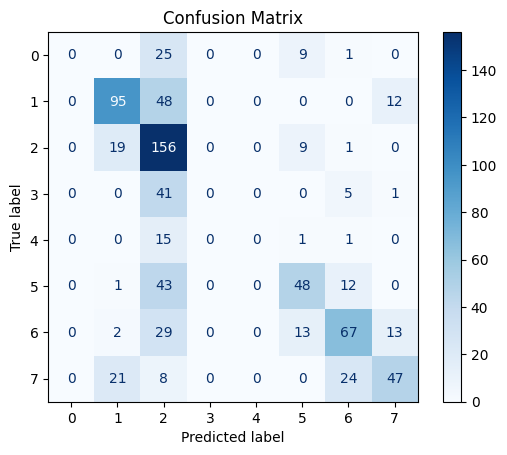

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sktime.transformations.panel.rocket import Rocket
from sktime.datatypes._panel._convert import from_2d_array_to_nested
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Load the dataset
data = pd.read_csv('../../00_Data_Input/relabelled_data_ksa_explore.csv')

# Preparing data for modeling
X = data[[f'VH_{i}' for i in range(31)]]
y = data['class']

# Convert labels to one-hot encoding if necessary (for classification)
y_one_hot = pd.get_dummies(y).values

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42, stratify=y)

# Convert the data to nested DataFrame format required by sktime
X_train_nested = from_2d_array_to_nested(X_train.to_numpy())
X_test_nested = from_2d_array_to_nested(X_test.to_numpy())

# Applying ROCKET transformation
rocket = Rocket(num_kernels=10000)
X_train_transform = rocket.fit_transform(X_train_nested)
X_test_transform = rocket.transform(X_test_nested)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_transform)
X_test_scaled = scaler.transform(X_test_transform)

# Define a basic neural network model
model = Sequential()
model.add(Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(y_train.shape[1], activation='softmax'))

# Compile the model with Adam optimizer and a learning rate scheduler
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Add a learning rate scheduler
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test), callbacks=[lr_scheduler])

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

# Classification report
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()


In [2]:
# !pip install keras-tuner --upgrade

Trial 5 Complete [00h 04m 27s]
val_accuracy: 0.5428074598312378

Best val_accuracy So Far: 0.5675793091456095
Total elapsed time: 00h 23m 41s

The optimal number of units in the first dense layer is 320.
The optimal number of units in the second dense layer is 128.
The optimal dropout rate for the first dropout layer is 0.30000000000000004.
The optimal dropout rate for the second dropout layer is 0.2.
The optimal learning rate for the optimizer is 0.001.

Epoch 1/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3293 - loss: 9.5825 - val_accuracy: 0.4055 - val_loss: 2.0377
Epoch 2/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3656 - loss: 2.6977 - val_accuracy: 0.4329 - val_loss: 1.5776
Epoch 3/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.4026 - loss: 1.7424 - val_accuracy: 0.4602 - val_loss: 1.5150
Epoch 4/50
96/96 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.4709 - loss: 1.5637 - val_accuracy: 0.4641 - val_loss: 1.4133
Epoch 5/50
96/96 ━━━━━━━━━━━━━━━

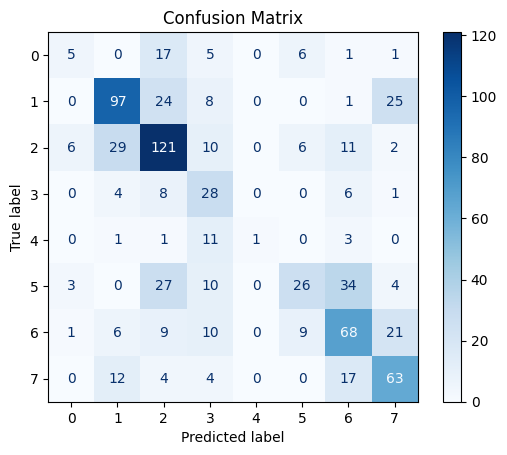

In [3]:
import kerastuner as kt
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int('units1', min_value=128, max_value=512, step=64), activation='relu', input_shape=(X_train_scaled.shape[1],)))
    model.add(Dropout(hp.Float('dropout1', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(hp.Int('units2', min_value=64, max_value=256, step=64), activation='relu'))
    model.add(Dropout(hp.Float('dropout2', min_value=0.0, max_value=0.5, step=0.1)))
    model.add(Dense(y_train.shape[1], activation='softmax'))

    model.compile(optimizer=Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
                  loss='categorical_crossentropy', metrics=['accuracy'])
    return model

tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='keras_tuner', project_name='rocket_nn_tuning')

# Search for the best hyperparameters
tuner.search(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of units in the first dense layer is {best_hps.get('units1')}.
The optimal number of units in the second dense layer is {best_hps.get('units2')}.
The optimal dropout rate for the first dropout layer is {best_hps.get('dropout1')}.
The optimal dropout rate for the second dropout layer is {best_hps.get('dropout2')}.
The optimal learning rate for the optimizer is {best_hps.get('learning_rate')}.
""")

# Build the model with the optimal hyperparameters and train it
model = tuner.hypermodel.build(best_hps)
history = model.fit(X_train_scaled, y_train, epochs=50, validation_data=(X_test_scaled, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy}")

# Classification report
y_pred = model.predict(X_test_scaled)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()
